In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\megha\Downloads\LungCapData.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (725, 7)

Column Names and Data Types:
Unnamed: 0      int64
LungCap       float64
Age             int64
Height        float64
Smoke          object
Gender         object
Caesarean      object
dtype: object

First few rows:
   Unnamed: 0  LungCap  Age  Height Smoke  Gender Caesarean
0           1    6.475    6    62.1    no    male        no
1           2   10.125   18    74.7   yes  female        no
2           3    9.550   16    69.7    no  female       yes
3           4   11.125   14    71.0    no    male        no
4           5    4.800    5    56.9    no    male        no

Basic Statistics:
       Unnamed: 0     LungCap         Age      Height
count   725.00000  725.000000  725.000000  725.000000
mean    363.00000    7.863148   12.326897   64.836276
std     209.43376    2.662008    4.004750    7.202144
min       1.00000    0.507000    3.000000   45.300000
25%     182.00000    6.150000    9.000000   59.900000
50%     363.00000    8.000000   13.000000   65.400000
75% 

In [3]:
print("Unique values in categorical columns:")
print("Smoke:", df['Smoke'].value_counts())
print("\nGender:", df['Gender'].value_counts())
print("\nCaesarean:", df['Caesarean'].value_counts())

# Check correlations between numerical variables
print("\nCorrelation Matrix for Numerical Variables:")
numerical_cols = ['LungCap', 'Age', 'Height']
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Basic statistics by groups
print("\nLung Capacity by Gender:")
print(df.groupby('Gender')['LungCap'].describe())

print("\nLung Capacity by Smoking Status:")
print(df.groupby('Smoke')['LungCap'].describe())

Unique values in categorical columns:
Smoke: Smoke
no     648
yes     77
Name: count, dtype: int64

Gender: Gender
male      367
female    358
Name: count, dtype: int64

Caesarean: Caesarean
no     561
yes    164
Name: count, dtype: int64

Correlation Matrix for Numerical Variables:
          LungCap       Age    Height
LungCap  1.000000  0.819675  0.912187
Age      0.819675  1.000000  0.835737
Height   0.912187  0.835737  1.000000

Lung Capacity by Gender:
        count      mean       std    min     25%   50%       75%     max
Gender                                                                  
female  358.0  7.405746  2.564242  0.507  5.7250  7.75   9.21875  13.075
male    367.0  8.309332  2.683238  1.175  6.5375  8.35  10.37500  14.675

Lung Capacity by Smoking Status:
       count      mean       std    min   25%   50%       75%     max
Smoke                                                                
no     648.0  7.770188  2.726113  0.507  6.00  7.90   9.73125  14.675
ye

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# Set the aesthetic style of the plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]

# Step 1: Data Preparation - Load the dataset
df = pd.read_csv(r"C:\Users\megha\Downloads\LungCapData.csv")

# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check column data types
print("\nData types:")
print(df.dtypes)

# Check unique values for categorical variables
print("\nUnique values in categorical columns:")
for col in ['Smoke', 'Gender', 'Caesarean']:
    print(f"{col}: {df[col].unique()}")
    

Dataset shape: (725, 7)

First 5 rows of the dataset:
   Unnamed: 0  LungCap  Age  Height Smoke  Gender Caesarean
0           1    6.475    6    62.1    no    male        no
1           2   10.125   18    74.7   yes  female        no
2           3    9.550   16    69.7    no  female       yes
3           4   11.125   14    71.0    no    male        no
4           5    4.800    5    56.9    no    male        no

Missing values in each column:
Unnamed: 0    0
LungCap       0
Age           0
Height        0
Smoke         0
Gender        0
Caesarean     0
dtype: int64

Summary statistics:
       Unnamed: 0     LungCap         Age      Height
count   725.00000  725.000000  725.000000  725.000000
mean    363.00000    7.863148   12.326897   64.836276
std     209.43376    2.662008    4.004750    7.202144
min       1.00000    0.507000    3.000000   45.300000
25%     182.00000    6.150000    9.000000   59.900000
50%     363.00000    8.000000   13.000000   65.400000
75%     544.00000    9.800000 

Dataset after removing index column:
   LungCap  Age  Height Smoke  Gender Caesarean
0    6.475    6    62.1    no    male        no
1   10.125   18    74.7   yes  female        no
2    9.550   16    69.7    no  female       yes
3   11.125   14    71.0    no    male        no
4    4.800    5    56.9    no    male        no

Correlation Matrix:
          LungCap       Age    Height
LungCap  1.000000  0.819675  0.912187
Age      0.819675  1.000000  0.835737
Height   0.912187  0.835737  1.000000


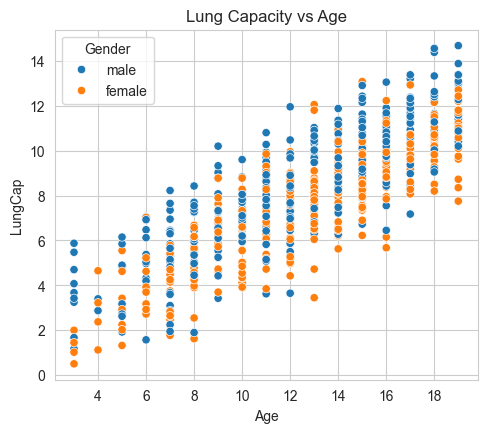

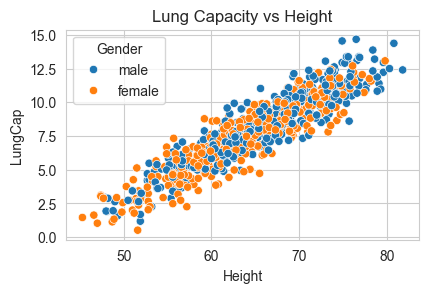

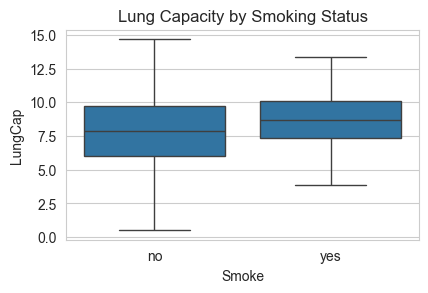

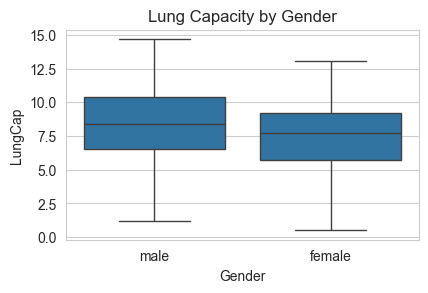


Encoded Dataset:
   LungCap  Age  Height  Smoke  Gender  Caesarean
0    6.475    6    62.1      0       1          0
1   10.125   18    74.7      1       0          0
2    9.550   16    69.7      0       0          1
3   11.125   14    71.0      0       1          0
4    4.800    5    56.9      0       1          0


In [12]:
# Remove the unnamed index column if present and examine the clean dataset
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("Dataset after removing index column:")
print(df.head())

# Exploratory Data Analysis
# Let's check the distribution of our target variable (LungCap)
plt.figure(figsize=(10, 6))
sns.histplot(df['LungCap'], kde=True)
plt.title('Distribution of Lung Capacity')
plt.xlabel('Lung Capacity')
plt.ylabel('Frequency')
plt.savefig('lungcap_distribution.png')
plt.close()

# Check correlations between numerical variables
numerical_vars = ['LungCap', 'Age', 'Height']
correlation_matrix = df[numerical_vars].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig('correlation_heatmap.png')
plt.close()
plt.show()

# Visualize relationships between variables
plt.figure(figsize=(12, 10))

# Lung Capacity vs Age
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='LungCap', data=df, hue='Gender')
plt.title('Lung Capacity vs Age')
plt.show()

# Lung Capacity vs Height
plt.subplot(2, 2, 2)
sns.scatterplot(x='Height', y='LungCap', data=df, hue='Gender')
plt.title('Lung Capacity vs Height')
plt.show()

# Box plots for categorical variables
plt.subplot(2, 2, 3)
sns.boxplot(x='Smoke', y='LungCap', data=df)
plt.title('Lung Capacity by Smoking Status')
plt.show()

plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='LungCap', data=df)
plt.title('Lung Capacity by Gender')
plt.show()

plt.tight_layout()
plt.savefig('exploratory_plots.png')
plt.close()

# Examine distribution of categorical variables
cat_vars = ['Smoke', 'Gender', 'Caesarean']
for var in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.savefig(f'{var}_distribution.png')
    plt.close()
    plt.show()
    
# Prepare data for modeling by converting categorical variables to appropriate format
# Convert categorical variables to numeric
df_encoded = df.copy()

# Map categorical variables to binary
df_encoded['Smoke'] = df_encoded['Smoke'].map({'no': 0, 'yes': 1})
df_encoded['Gender'] = df_encoded['Gender'].map({'female': 0, 'male': 1})
df_encoded['Caesarean'] = df_encoded['Caesarean'].map({'no': 0, 'yes': 1})

print("\nEncoded Dataset:")
print(df_encoded.head())

In [13]:
# Separate features and target variable
X = df_encoded.drop('LungCap', axis=1)
y = df_encoded['LungCap']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['Gender']
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Features: {list(X.columns)}")


Training set size: 580 samples
Testing set size: 145 samples
Features: ['Age', 'Height', 'Smoke', 'Gender', 'Caesarean']


=== BASELINE MODEL RESULTS ===
Features used: Age, Height
R² Score: 0.8444
RMSE: 1.0865
MAE: 0.8610

Model Coefficients:
Age coefficient: 0.1133
Height coefficient: 0.2862
Intercept: -12.0982


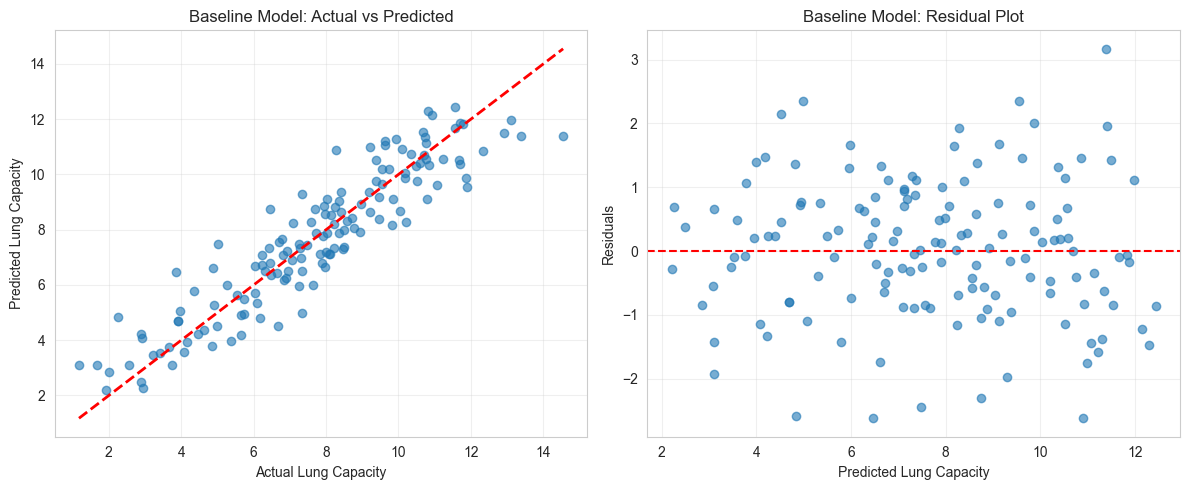

In [14]:
# Create baseline model using only Age and Height
X_train_baseline = X_train[['Age', 'Height']]
X_test_baseline = X_test[['Age', 'Height']]

# Initialize and train the baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train_baseline, y_train)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test_baseline)

# Calculate performance metrics
baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print("=== BASELINE MODEL RESULTS ===")
print(f"Features used: Age, Height")
print(f"R² Score: {baseline_r2:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"MAE: {baseline_mae:.4f}")

# Display model coefficients
print(f"\nModel Coefficients:")
print(f"Age coefficient: {baseline_model.coef_[0]:.4f}")
print(f"Height coefficient: {baseline_model.coef_[1]:.4f}")
print(f"Intercept: {baseline_model.intercept_:.4f}")

# Visualize baseline model performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_baseline, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Lung Capacity')
plt.ylabel('Predicted Lung Capacity')
plt.title('Baseline Model: Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_baseline
plt.scatter(y_pred_baseline, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Lung Capacity')
plt.ylabel('Residuals')
plt.title('Baseline Model: Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [15]:
# Create preprocessing pipeline for all features
numeric_features = ['Age', 'Height']
categorical_features = ['Smoke', 'Gender', 'Caesarean']

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create pipeline for expanded model
expanded_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the expanded model
expanded_model.fit(X_train, y_train)

# Make predictions
y_pred_expanded = expanded_model.predict(X_test)

# Calculate performance metrics
expanded_r2 = r2_score(y_test, y_pred_expanded)
expanded_rmse = np.sqrt(mean_squared_error(y_test, y_pred_expanded))
expanded_mae = mean_absolute_error(y_test, y_pred_expanded)

print("=== EXPANDED MODEL RESULTS (All Features) ===")
print(f"R² Score: {expanded_r2:.4f}")
print(f"RMSE: {expanded_rmse:.4f}")
print(f"MAE: {expanded_mae:.4f}")


=== EXPANDED MODEL RESULTS (All Features) ===
R² Score: 0.8556
RMSE: 1.0467
MAE: 0.8413


In [16]:
# Create model with polynomial features (interaction terms)
interaction_model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('regressor', LinearRegression())
])

# Train the interaction model
interaction_model.fit(X_train, y_train)

# Make predictions
y_pred_interaction = interaction_model.predict(X_test)

# Calculate performance metrics
interaction_r2 = r2_score(y_test, y_pred_interaction)
interaction_rmse = np.sqrt(mean_squared_error(y_test, y_pred_interaction))
interaction_mae = mean_absolute_error(y_test, y_pred_interaction)

print("=== INTERACTION MODEL RESULTS ===")
print(f"R² Score: {interaction_r2:.4f}")
print(f"RMSE: {interaction_rmse:.4f}")
print(f"MAE: {interaction_mae:.4f}")

# Compare model performance
print("\n=== MODEL COMPARISON ===")
models_comparison = pd.DataFrame({
    'Model': ['Baseline (Age + Height)', 'All Features', 'With Interactions'],
    'R² Score': [baseline_r2, expanded_r2, interaction_r2],
    'RMSE': [baseline_rmse, expanded_rmse, interaction_rmse],
    'MAE': [baseline_mae, expanded_mae, interaction_mae]
})
print(models_comparison)


=== INTERACTION MODEL RESULTS ===
R² Score: 0.8560
RMSE: 1.0452
MAE: 0.8449

=== MODEL COMPARISON ===
                     Model  R² Score      RMSE       MAE
0  Baseline (Age + Height)  0.844440  1.086471  0.861018
1             All Features  0.855611  1.046735  0.841274
2        With Interactions  0.856022  1.045244  0.844880


=== MODEL COMPARISON RESULTS ===

Linear Regression:
  R² Score: 0.8556
  RMSE: 1.0467
  MAE: 0.8413

Polynomial Regression:
  R² Score: 0.8572
  RMSE: 1.0410
  MAE: 0.8351

Ridge Regression:
  R² Score: 0.8558
  RMSE: 1.0462
  MAE: 0.8406

Lasso Regression:
  R² Score: 0.8433
  RMSE: 1.0904
  MAE: 0.8567

Elastic Net:
  R² Score: 0.8501
  RMSE: 1.0664
  MAE: 0.8383

Random Forest:
  R² Score: 0.8371
  RMSE: 1.1117
  MAE: 0.9040

Gradient Boosting:
  R² Score: 0.8529
  RMSE: 1.0565
  MAE: 0.8440

=== SUMMARY TABLE ===
                   Model  R² Score    RMSE     MAE
0      Linear Regression    0.8556  1.0467  0.8413
1  Polynomial Regression    0.8572  1.0410  0.8351
2       Ridge Regression    0.8558  1.0462  0.8406
3       Lasso Regression    0.8433  1.0904  0.8567
4            Elastic Net    0.8501  1.0664  0.8383
5          Random Forest    0.8371  1.1117  0.9040
6      Gradient Boosting    0.8529  1.0565  0.8440


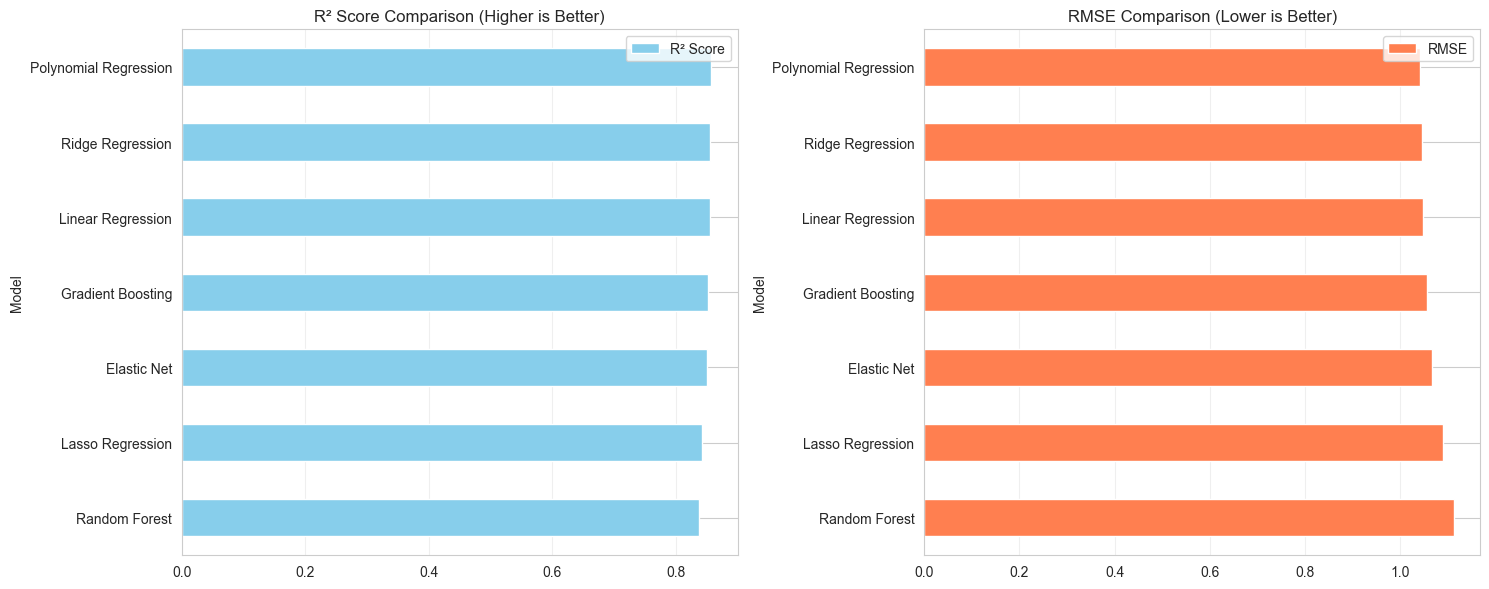

In [17]:
# Define function to evaluate models consistently
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate a model and return performance metrics"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    return {
        'Model': model_name,
        'R² Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'Predictions': y_pred
    }

# Define models to compare
models_to_test = [
    # Linear models
    ('Linear Regression', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])),
    
    # Polynomial regression
    ('Polynomial Regression', Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regressor', LinearRegression())
    ])),
    
    # Regularized models
    ('Ridge Regression', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0))
    ])),
    
    ('Lasso Regression', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1))
    ])),
    
    ('Elastic Net', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
    ])),
    
    # Ensemble methods
    ('Random Forest', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])),
    
    ('Gradient Boosting', Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]))
]

# Evaluate all models
results = []
print("=== MODEL COMPARISON RESULTS ===")

for model_name, model in models_to_test:
    result = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    results.append(result)
    print(f"\n{model_name}:")
    print(f"  R² Score: {result['R² Score']:.4f}")
    print(f"  RMSE: {result['RMSE']:.4f}")
    print(f"  MAE: {result['MAE']:.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {k: v for k, v in result.items() if k != 'Predictions'} 
    for result in results
])

print("\n=== SUMMARY TABLE ===")
print(comparison_df.round(4))

# Visualize model comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# R² Score comparison
comparison_df.sort_values('R² Score', ascending=True).plot(
    x='Model', y='R² Score', kind='barh', ax=ax1, color='skyblue'
)
ax1.set_title('R² Score Comparison (Higher is Better)')
ax1.grid(axis='x', alpha=0.3)

# RMSE comparison
comparison_df.sort_values('RMSE', ascending=False).plot(
    x='Model', y='RMSE', kind='barh', ax=ax2, color='coral'
)
ax2.set_title('RMSE Comparison (Lower is Better)')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


Top 3 models for cross-validation: ['Polynomial Regression', 'Ridge Regression', 'Linear Regression']

=== 5-FOLD CROSS-VALIDATION RESULTS ===

Linear Regression:
  R² Score: 0.8490 ± 0.0092
  RMSE: 1.0209 ± 0.0280
  Individual R² scores: [0.85293449 0.83664037 0.86287496 0.84118515 0.85116842]

Polynomial Regression:
  R² Score: 0.8423 ± 0.0093
  RMSE: 1.0432 ± 0.0312
  Individual R² scores: [0.84909813 0.83273298 0.85620282 0.84156298 0.8320803 ]

Ridge Regression:
  R² Score: 0.8490 ± 0.0093
  RMSE: 1.0209 ± 0.0282
  Individual R² scores: [0.85311884 0.8365198  0.86281212 0.84093287 0.85148763]

=== CROSS-VALIDATION SUMMARY ===
                       R² Mean  R² Std  RMSE Mean  RMSE Std
Linear Regression       0.8490  0.0092     1.0209    0.0280
Polynomial Regression   0.8423  0.0093     1.0432    0.0312
Ridge Regression        0.8490  0.0093     1.0209    0.0282


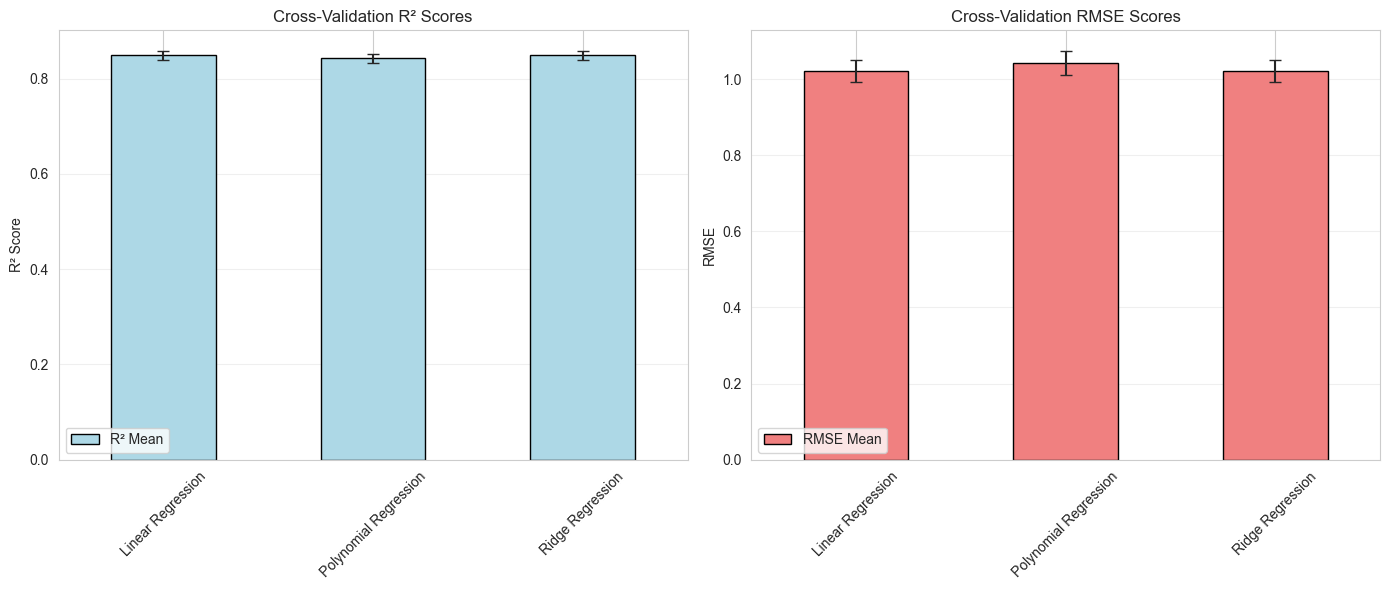

In [18]:
# Identify top performing models for cross-validation
top_models = comparison_df.nlargest(3, 'R² Score')['Model'].tolist()
print(f"Top 3 models for cross-validation: {top_models}")

# Select corresponding model objects
selected_models = [(name, model) for name, model in models_to_test 
                  if name in top_models]

# Perform k-fold cross-validation
cv_results = {}
k_folds = 5

print(f"\n=== {k_folds}-FOLD CROSS-VALIDATION RESULTS ===")

for model_name, model in selected_models:
    # Perform cross-validation
    r2_scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='r2')
    neg_mse_scores = cross_val_score(model, X_train, y_train, cv=k_folds, 
                                   scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse_scores)
    
    # Store results
    cv_results[model_name] = {
        'R² Mean': r2_scores.mean(),
        'R² Std': r2_scores.std(),
        'RMSE Mean': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    
    print(f"\n{model_name}:")
    print(f"  R² Score: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print(f"  RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"  Individual R² scores: {r2_scores}")

# Create cross-validation results DataFrame
cv_df = pd.DataFrame(cv_results).T
print("\n=== CROSS-VALIDATION SUMMARY ===")
print(cv_df.round(4))

# Visualize cross-validation results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# R² scores with error bars
cv_df.plot(y='R² Mean', yerr='R² Std', kind='bar', ax=ax1, 
          capsize=4, color='lightblue', edgecolor='black')
ax1.set_title('Cross-Validation R² Scores')
ax1.set_ylabel('R² Score')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# RMSE scores with error bars
cv_df.plot(y='RMSE Mean', yerr='RMSE Std', kind='bar', ax=ax2, 
          capsize=4, color='lightcoral', edgecolor='black')
ax2.set_title('Cross-Validation RMSE Scores')
ax2.set_ylabel('RMSE')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
# Select the best model for hyperparameter tuning
best_model_name = cv_df['R² Mean'].idxmax()
print(f"Best model for hyperparameter tuning: {best_model_name}")

# Define hyperparameter grids for different models
if 'Random Forest' in best_model_name:
    # Random Forest hyperparameter tuning
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__max_features': ['sqrt', 'log2', None]
    }
    
    model_for_tuning = rf_pipeline

elif 'Gradient Boosting' in best_model_name:
    # Gradient Boosting hyperparameter tuning
    gb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
    
    param_grid = {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [3, 5, 7],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    }
    
    model_for_tuning = gb_pipeline

else:
    # For regularized models
    param_grid = {
        'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }
    model_for_tuning = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ])

# Perform grid search
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
print("This may take a few minutes...")

grid_search = GridSearchCV(
    model_for_tuning,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Display best parameters and score
print(f"\n=== HYPERPARAMETER TUNING RESULTS ===")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate optimized model on test set
y_pred_optimized = best_model.predict(X_test)
optimized_r2 = r2_score(y_test, y_pred_optimized)
optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
optimized_mae = mean_absolute_error(y_test, y_pred_optimized)

print(f"\n=== OPTIMIZED MODEL TEST SET PERFORMANCE ===")
print(f"R² Score: {optimized_r2:.4f}")
print(f"RMSE: {optimized_rmse:.4f}")
print(f"MAE: {optimized_mae:.4f}")


Best model for hyperparameter tuning: Ridge Regression

Performing hyperparameter tuning for Ridge Regression...
This may take a few minutes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

=== HYPERPARAMETER TUNING RESULTS ===
Best parameters: {'regressor__alpha': 1.0}
Best cross-validation R² score: 0.8490

=== OPTIMIZED MODEL TEST SET PERFORMANCE ===
R² Score: 0.8558
RMSE: 1.0462
MAE: 0.8406


=== FINAL MODEL EVALUATION ===

Final Test Set Performance:
R² Score: 0.8558
RMSE: 1.0462
MAE: 0.8406


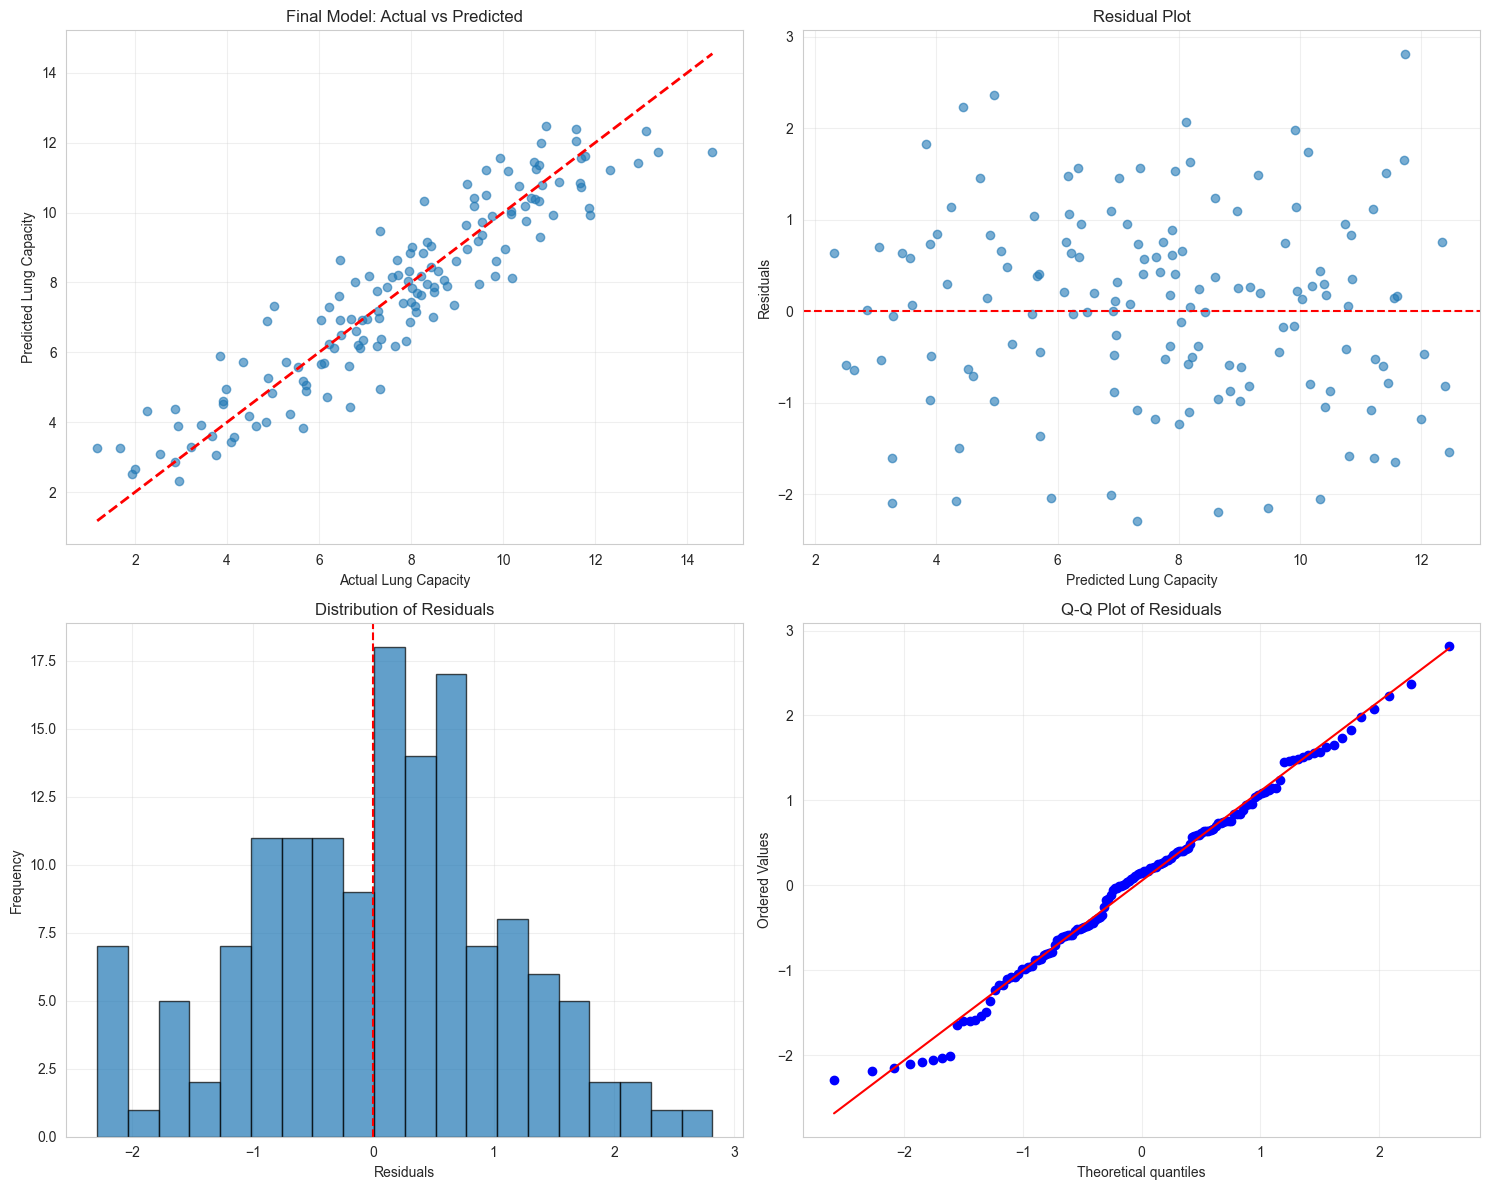


=== FINAL MODEL SUMMARY ===
Model Type: Ridge Regression
Best Parameters: {'regressor__alpha': 1.0}
Cross-validation R² Score: 0.8490
Test Set R² Score: 0.8558
Test Set RMSE: 1.0462
Test Set MAE: 0.8406
Mean Absolute Percentage Error (MAPE): 14.11%
Approximate 95% Prediction Interval: ± 2.048 liters


In [20]:
# Final comprehensive evaluation
print("=== FINAL MODEL EVALUATION ===")

# Performance on test set
print(f"\nFinal Test Set Performance:")
print(f"R² Score: {optimized_r2:.4f}")
print(f"RMSE: {optimized_rmse:.4f}")
print(f"MAE: {optimized_mae:.4f}")

# Feature importance analysis (if applicable)
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    # Get feature names after preprocessing
    feature_names = (numeric_features + 
                    [f"{cat}_1" for cat in categorical_features])
    
    importances = best_model.named_steps['regressor'].feature_importances_
    
    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': feature_names[:len(importances)],
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n=== FEATURE IMPORTANCE ===")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance (Final Model)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Comprehensive visualization of final model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_optimized, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], 
               [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Lung Capacity')
axes[0, 0].set_ylabel('Predicted Lung Capacity')
axes[0, 0].set_title('Final Model: Actual vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

# Residuals plot
residuals_final = y_test - y_pred_optimized
axes[0, 1].scatter(y_pred_optimized, residuals_final, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Lung Capacity')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Residuals histogram
axes[1, 0].hist(residuals_final, bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot for residuals normality
from scipy import stats
stats.probplot(residuals_final, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Model performance summary
print(f"\n=== FINAL MODEL SUMMARY ===")
print(f"Model Type: {best_model_name}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Cross-validation R² Score: {grid_search.best_score_:.4f}")
print(f"Test Set R² Score: {optimized_r2:.4f}")
print(f"Test Set RMSE: {optimized_rmse:.4f}")
print(f"Test Set MAE: {optimized_mae:.4f}")

# Calculate additional metrics
mape = np.mean(np.abs((y_test - y_pred_optimized) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Prediction intervals (approximate)
residual_std = np.std(residuals_final)
print(f"Approximate 95% Prediction Interval: ± {1.96 * residual_std:.3f} liters")
